In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

In [11]:
df=pd.read_csv("/Users/016800173/Desktop/CharlesBookClub.csv")

In [13]:
pd.pandas.set_option('display.max_columns',None)
data.sample(5)

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence
1715,1716,14185,1,96,10,4,24,1,0,1,0,1,1,0,0,0,0,0,1,3,3,3,0,1
1740,1741,14349,1,185,30,1,30,0,1,0,0,0,0,0,1,0,0,0,1,4,4,1,0,1
1530,1531,12689,0,310,6,11,68,2,0,3,2,0,0,0,0,0,0,1,0,5,2,3,1,0
2078,2079,17200,0,366,32,10,88,4,1,2,1,0,0,1,0,0,1,0,2,5,4,3,0,1
1369,1370,11457,1,46,10,2,14,1,0,0,0,0,0,0,0,0,0,0,0,2,3,2,0,1


In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Seq#              4000 non-null   int64
 1   ID#               4000 non-null   int64
 2   Gender            4000 non-null   int64
 3   M                 4000 non-null   int64
 4   R                 4000 non-null   int64
 5   F                 4000 non-null   int64
 6   FirstPurch        4000 non-null   int64
 7   ChildBks          4000 non-null   int64
 8   YouthBks          4000 non-null   int64
 9   CookBks           4000 non-null   int64
 10  DoItYBks          4000 non-null   int64
 11  RefBks            4000 non-null   int64
 12  ArtBks            4000 non-null   int64
 13  GeogBks           4000 non-null   int64
 14  ItalCook          4000 non-null   int64
 15  ItalAtlas         4000 non-null   int64
 16  ItalArt           4000 non-null   int64
 17  Florence          4000 non-null  

## Part a) 
## Drop the following columns 'Seq#', 'ID#', 'Gender', 'M', 'R', 'F', 'FirstPurch', 'Related Purchase', 'Mcode', 'Rcode', 'Fcode', 'Yes_Florence', 'No_Florence'

In [6]:
# Drop specified columns
columns_to_drop = ['Seq#', 'ID#', 'Gender', 'M', 'R', 'F', 'FirstPurch', 'Related Purchase', 'Mcode', 'Rcode', 'Fcode', 'Yes_Florence', 'No_Florence']
df_cleaned = df.drop(columns=columns_to_drop)


In [7]:
# Assign 1 to values greater than 1
df_cleaned[df_cleaned > 1] = 1

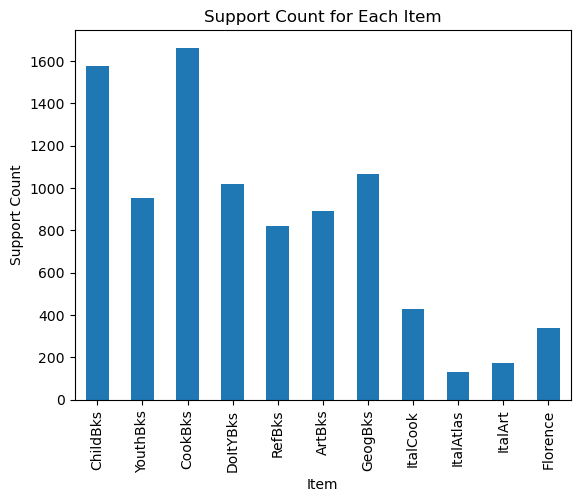

In [8]:
# Plot support count for each item
support_count = df_cleaned.sum(axis=0)
support_count.plot(kind='bar')
plt.title('Support Count for Each Item')
plt.xlabel('Item')
plt.ylabel('Support Count')
plt.show()

## Part b)
## Find frequent itemsets with min_support = 5%

In [17]:
min_support = 0.05
frequent_itemsets = apriori(df_cleaned, min_support=min_support, use_colnames=True)


C:\Users\016800173\AppData\Local\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [20]:
# Part c)
# Find association rules 
## Define min_confidence= 0.5 and print the 25 rules with the highest lift alonside theircorresponding support, confidence, and lift. after finding the rules withmin_confidence, sort them based on lift in descending order and print the top 25with their corresponding support, confidence, and lift.

In [21]:

min_confidence = 0.5
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=min_confidence)


In [23]:
# Sort rules by lift in descending order
rules_sorted = rules.sort_values(by='lift', ascending=False)

# Print top 25 rules with support, confidence, and lift
top_25_rules = rules_sorted.head(25)
print("Top 25 Rules with Highest Lift:")
print(top_25_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Top 25 Rules with Highest Lift:
                      antecedents          consequents  support  confidence  \
64             (YouthBks, RefBks)  (ChildBks, CookBks)  0.05525    0.680000   
73             (DoItYBks, RefBks)  (ChildBks, CookBks)  0.06125    0.662162   
60           (YouthBks, DoItYBks)  (ChildBks, CookBks)  0.06700    0.648910   
80              (GeogBks, RefBks)  (ChildBks, CookBks)  0.05025    0.614679   
69            (YouthBks, GeogBks)  (ChildBks, CookBks)  0.06325    0.605263   
77            (DoItYBks, GeogBks)  (ChildBks, CookBks)  0.06050    0.599010   
67   (ChildBks, GeogBks, CookBks)           (YouthBks)  0.06325    0.577626   
71    (ChildBks, CookBks, RefBks)           (DoItYBks)  0.06125    0.591787   
49            (DoItYBks, GeogBks)           (YouthBks)  0.05450    0.539604   
62    (ChildBks, CookBks, RefBks)           (YouthBks)  0.05525    0.533816   
58  (ChildBks, DoItYBks, CookBks)           (YouthBks)  0.06700    0.524462   
57  (ChildBks, Youth

# Part d)
# Filter rules by number of antecedents (max 2) and consequents (max 1) and print the rules with their support, confidence, and lift.

In [24]:

filtered_rules = rules[(rules['antecedents'].apply(lambda x: len(x)) <= 2) & (rules['consequents'].apply(lambda x: len(x)) <= 1)]

# Print filtered rules with support, confidence, and lift
print("\nFiltered Rules with Maximum 2 Antecedents and 1 Consequent:")
print(filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Filtered Rules with Maximum 2 Antecedents and 1 Consequent:
             antecedents consequents  support  confidence      lift
0             (YouthBks)  (ChildBks)  0.14750    0.619098  1.571314
1             (ChildBks)   (CookBks)  0.24200    0.614213  1.478251
2              (CookBks)  (ChildBks)  0.24200    0.582431  1.478251
3             (DoItYBks)  (ChildBks)  0.16150    0.633955  1.609022
4               (RefBks)  (ChildBks)  0.12825    0.626374  1.589781
5              (GeogBks)  (ChildBks)  0.14625    0.548266  1.391538
6             (ItalCook)  (ChildBks)  0.06025    0.560465  1.422500
7             (YouthBks)   (CookBks)  0.16100    0.675761  1.626380
8             (DoItYBks)   (CookBks)  0.16875    0.662414  1.594258
9               (RefBks)   (CookBks)  0.13975    0.682540  1.642695
10              (ArtBks)   (CookBks)  0.11300    0.506726  1.219558
11             (GeogBks)   (CookBks)  0.15625    0.585754  1.409758
12            (ItalCook)   (CookBks)  0.06875    0.6395

## Output Interpretation

Support: The proportion of transactions that contain the itemset.

Confidence: The conditional probability of the consequent given the antecedent(s).

Lift: The ratio of the observed support to the support expected under independence. Lift > 1 indicates positive association.